# Probability Final Exam

### Name:- Kashyap Shekhada
    
### Reg No:- 23PGAI0102

In [422]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import roc_curve, auc
from scipy.stats import f_oneway

In [423]:
telecom_df = pd.read_csv("Kashyap+Shekhada.csv")
telecom_df.head(10)

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,current_active_plan_validity,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay
0,10000,individual,7,0,86.0,110.0,142.708159,136.428572,196.0,279.136731,...,700,500,120,-2.361075,4.856461,4.284286,4.0,9.862417,20K_to_30K,-8.514211
1,10001,individual,7,0,5.0,10.0,5.214007,18.497962,15.0,23.711969,...,15,999,180,-0.006704,10.539503,6.600000,0.5,44.862016,50K_above,2.857576
2,10002,individual,5,0,48.0,36.0,50.217910,46.451388,84.0,96.669298,...,28,99,15,-0.084768,0.071808,4.571429,1.0,48.901375,10K_to_20K,-8.120090
3,10003,individual,6,0,20.0,24.0,26.551839,31.074218,44.0,57.626057,...,700,99,15,11.017241,0.751815,4.284286,4.0,22.789654,50K_above,2.043550
4,10004,individual,2,0,8.0,106.0,8.445154,119.922220,114.0,128.367375,...,120,1500,365,2.162639,2.239687,4.166667,2.0,27.811878,50K_above,1.002575
5,10005,individual,8,0,33.0,113.0,55.483377,156.288702,146.0,211.772078,...,28,2999,700,0.211723,1.238016,4.571429,1.0,23.428576,10K_to_20K,-2.561945
6,10006,individual,3,0,43.0,46.0,73.514153,67.879564,89.0,141.393717,...,365,1500,365,1.606976,3.991711,4.109589,3.0,9.608119,30K_to_50K,-0.192935
7,10007,individual,5,1,74.0,30.0,107.301671,31.288917,104.0,138.590588,...,700,500,120,1.743317,0.142166,4.284286,4.0,7.315457,10K_to_20K,-1.674808
8,10008,corporate,3,0,6.0,95.0,6.507467,124.069265,101.0,130.576731,...,180,999,180,0.361502,0.749212,5.550000,3.0,19.162800,50K_above,-8.905724
9,10009,corporate,4,0,46.0,12.0,74.040126,20.681025,58.0,94.721150,...,365,999,180,-3.505047,1.196882,4.109589,3.0,8.428439,less_10K,-0.231327


# Finding and dropping the missing value



In [424]:
telecom_df = telecom_df.dropna()
telecom_df['ownership'] = telecom_df['ownership'].apply(lambda x: 1 if x == "individual" else 0)
telecom_df = pd.get_dummies(telecom_df,drop_first=True)

In [425]:
telecom_df.head(50)

,customer_id,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,...,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,recharge_delay,device_avg_asp_20K_to_30K,device_avg_asp_30K_to_50K,device_avg_asp_50K_above,device_avg_asp_less_10K
0,10000,1,7,0,86.0,110.0,142.708159,136.428572,196.0,279.136731,...,-2.361075,4.856461,4.284286,4.0,9.862417,-8.514211,1,0,0,0
1,10001,1,7,0,5.0,10.0,5.214007,18.497962,15.0,23.711969,...,-0.006704,10.539503,6.600000,0.5,44.862016,2.857576,0,0,1,0
3,10003,1,6,0,20.0,24.0,26.551839,31.074218,44.0,57.626057,...,11.017241,0.751815,4.284286,4.0,22.789654,2.043550,0,0,1,0
4,10004,1,2,0,8.0,106.0,8.445154,119.922220,114.0,128.367375,...,2.162639,2.239687,4.166667,2.0,27.811878,1.002575,0,0,1,0
5,10005,1,8,0,33.0,113.0,55.483377,156.288702,146.0,211.772078,...,0.211723,1.238016,4.571429,1.0,23.428576,-2.561945,0,0,0,0
6,10006,1,3,0,43.0,46.0,73.514153,67.879564,89.0,141.393717,...,1.606976,3.991711,4.109589,3.0,9.608119,-0.192935,0,1,0,0
7,10007,1,5,1,74.0,30.0,107.301671,31.288917,104.0,138.590588,...,1.743317,0.142166,4.284286,4.0,7.315457,-1.674808,0,0,0,0
8,10008,0,3,0,6.0,95.0,6.507467,124.069265,101.0,130.576731,...,0.361502,0.749212,5.550000,3.0,19.162800,-8.905724,0,0,1,0
9,10009,0,4,0,46.0,12.0,74.040126,20.681025,58.0,94.721150,...,-3.505047,1.196882,4.109589,3.0,8.428439,-0.231327,0,0,0,1
10,10010,1,9,1,99.0,28.0,188.229497,38.683071,127.0,226.912568,...,-4.562163,2.424239,4.571429,1.0,55.135792,13.887095,0,0,0,1


# Question-1(A)

In question-1(A) we have to find the customber who has done the recharge after the plan expires so for that we are considering 
the column "avg_days_bw_rchg_and_expiry" and we are plotting histogram for that

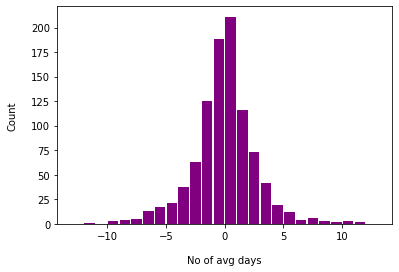

In [426]:
recharge_df = telecom_df['avg_days_bw_rchg_and_expiry']
range = (-13,13)
bins = 26
plt.hist(recharge_df, bins, range, color = "purple", histtype = "bar", rwidth = 0.9,)
plt.xlabel("No of avg days", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.show()

So from the histogram we can say that this is Gaussian distribution but here we have to considered the customer who recharged 
plan late so we have to considered the positive value. So we can again plot the histogram for the positive value.

Text(0, 0.5, 'Frequency')

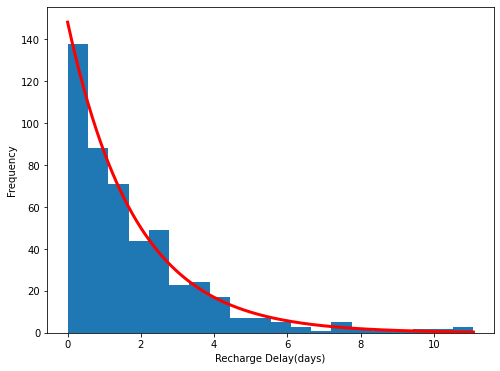

In [427]:
recharge_df = np.array(telecom_df.loc[telecom_df["avg_days_bw_rchg_and_expiry"]>0,["avg_days_bw_rchg_and_expiry"]])
data_mean = recharge_df.mean()
rate = 1. / data_mean
data_max=recharge_df.max()
days=np.linspace(0.,data_max,1000)
dt=data_max/999
exp=stats.expon.pdf(days,scale=1. /rate)
fig,ax=plt.subplots(1,1,figsize=(8,6))
nbins=20
ax.hist(recharge_df,nbins)
ax.plot(days,exp*len(recharge_df)*data_max/nbins, '-r',lw=3)
plt.xlabel('Recharge Delay(days)');plt.ylabel('Frequency')

From the graph we can say that this distribution is Exponential distribution.

For this question I have considered one more factor which is "recharge_delay" and I have plotted histogram for that and from 
graph we can say that it is also give exponenetial distribution.

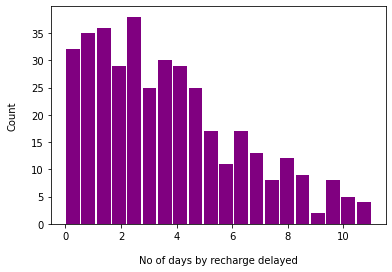

In [428]:
recharge_df = telecom_df['recharge_delay']
range = (0,11)
bins = 20
plt.hist(recharge_df, bins, range, color = "purple", histtype = "bar", rwidth = 0.9,)
plt.xlabel("No of days by recharge delayed", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.show()

In question-1(B) is finding the 95% CI and for that I am considering the "avg_days_bw_rchg_and_expiry" column and we have also
find the point estimation for that column.

# Question-1(B)

In [429]:
after_recharge_data = telecom_df[telecom_df["avg_days_bw_rchg_and_expiry"] > 0]
after_recharge_colum = after_recharge_data["avg_days_bw_rchg_and_expiry"]
after_recharge_colum.describe()

count    493.000000
mean       1.842489
std        1.923845
min        0.003104
25%        0.504933
50%        1.195816
75%        2.482903
max       11.076130
Name: avg_days_bw_rchg_and_expiry, dtype: float64

In [430]:
x = np.array(telecom_df.loc[telecom_df["avg_days_bw_rchg_and_expiry"]>0,["avg_days_bw_rchg_and_expiry"]])
N = len(x)
smean = x.mean()
rate = 1./smean
svar = (1./rate)**2
S_hat = np.sqrt(svar)
interval = stats.norm.interval(0.95, loc=smean,scale = S_hat/np.sqrt(N))
print("Confidence level of the Recharge delay customers :",interval)

Confidence level of the Recharge delay customers : (1.6798478841486422, 2.005129450305109)


# Question-1(C)

In [431]:
x = telecom_df["recharge_delay"]

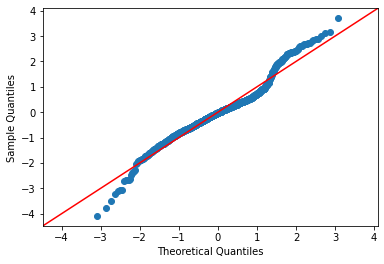

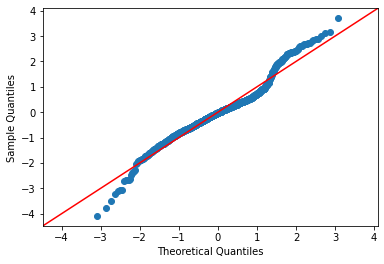

In [432]:
sm.qqplot(x,line='45',fit=True,dist=stats.norm)

Find the Q-Q plot for the column recharge_delay

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recharge_delay'>

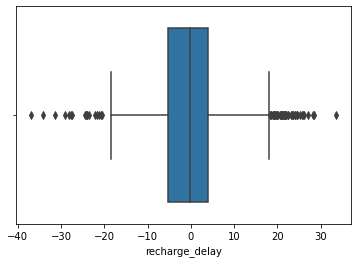

In [433]:
churned_data = telecom_df.sort_values(by = ['recharge_delay'],ascending =False)
sns.boxplot(churned_data.recharge_delay)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    970.000000
mean       0.033835
std        9.037700
min      -36.877565
25%       -5.305636
50%       -0.168538
75%        4.033625
max       33.490450
Name: recharge_delay, dtype: float64

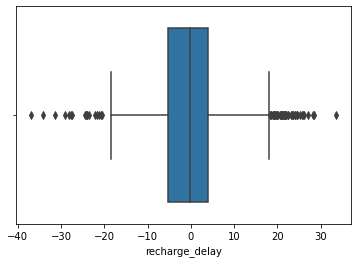

In [434]:
data_churner = telecom_df.sort_values(by = ['recharge_delay'],ascending =False)
sns.boxplot(data_churner.recharge_delay)
telecom_df.recharge_delay.describe()

In [435]:
churned_data.recharge_delay.describe()
np.percentile(churned_data.recharge_delay,80)

5.017566374927654

Here I have take the value of X is 20.

# Question-2(A)

In Question-2(A) we have to do hypothesis testing for that and for that we are finding the null hypothesis.

Null hypothesis H0 = Customers who are not ready to forego their phone numbers (mnp_flag=1) recharge earlier than the rest.

Alternate hypothesis H1 = Customers who are ready to forego their phone numbers (mnp_flag=0)recharge earlier than the rest.

In [436]:
data_flag1 = telecom_df[telecom_df["mnp_flag"] == 1]
mnp_flag_1 = data_flag1["avg_days_bw_rchg_and_expiry"]
mnp_flag_1.head()

7     1.743317
10   -4.562163
11   -0.883425
13   -1.971852
15    0.476495
Name: avg_days_bw_rchg_and_expiry, dtype: float64

In [437]:
data_flag0 = telecom_df[telecom_df["mnp_flag"] == 0]
mnp_flag_0 = data_flag0["avg_days_bw_rchg_and_expiry"]
mnp_flag_0.head()

0    -2.361075
1    -0.006704
3    11.017241
4     2.162639
5     0.211723
Name: avg_days_bw_rchg_and_expiry, dtype: float64

Here we are using T-test for finding the p-value.

In [438]:
ttest,pval = ttest_ind(mnp_flag_1,mnp_flag_0, alternative = 'less')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.2741860344782371
We fail to reject null hypothesis


So from the result of T-test we can say that we are accepting the Null hypothesis that mean Customers who are not 
ready to forego their phone numbers  recharge earlier than the rest.

# Question-2(B)

So in Question-2(B) our 

Null hypothesis H0 = Committed customers which means customers with current plan validity more than last cycle plan validity 
recharge earlier than the rest.

Alternate hypothesis H1 = Customers with current plan validity less than last cycle plan validity recharge earlier than 
the rest.

In [439]:
validity_df0 = telecom_df[telecom_df["current_active_plan_validity"]> telecom_df["last_cycle_plan_validity"]]
validity_h0 = validity_df0["avg_days_bw_rchg_and_expiry"]
validity_h0.head() #printing the head of avg_days_bw_rchg_and_expiry which has more current plan validity than last plan validity

0     -2.361075
3     11.017241
7      1.743317
9     -3.505047
14     1.211592
Name: avg_days_bw_rchg_and_expiry, dtype: float64

In [440]:
validity_df1 = telecom_df[telecom_df["current_active_plan_validity"]<= telecom_df["last_cycle_plan_validity"]]
validity_h1 = validity_df1["avg_days_bw_rchg_and_expiry"]
validity_h1.head()

1   -0.006704
4    2.162639
5    0.211723
6    1.606976
8    0.361502
Name: avg_days_bw_rchg_and_expiry, dtype: float64

In [441]:
ttest,pval = ttest_ind(validity_h0,validity_h1, alternative = 'less')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.7390519913741656
We fail to reject null hypothesis


So from the hypothesis testing we are accepting the Null hypothesis which mean Committed customers recharge earlier than the 
rest.

# Question-2(C)

Null hypothesis H0 = Customers who are not ready to forego their phone numbers (mnp_flag=1) show better engagement.

Alternate hypothesis H1 = Customers who are not ready to forego their phone numbers (mnp_flag=0) show better engagement.

For this part I am considering the better engagement mean of data usage.

So for this part,

Null hypothesis H0 = Customers who are not ready to forego their phone numbers (mnp_flag=1) using more data.

Null hypothesis H1 = Customers who are  ready to forego their phone numbers (mnp_flag=0) using more data.

In [442]:
data_usage1 = data_flag1["tot_usage_mb"] #total data usage which has mnp flag = 1
data_usage0 = data_flag0["tot_usage_mb"] #total data usage which has mnp flag = 0

In [443]:
ttest,pval = ttest_ind(data_usage1,data_usage0, alternative = 'greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.7940531237792772
We fail to reject null hypothesis


From the hypothesis we are accepting the null hypothesis means Customers who are not ready to forego their phone numbers
using more data.

In this part I am considering better engagement mean using more calling feature. 

Null hypothesis H0 = Customers who are not ready to forego their phone numbers (mnp_flag=1) using more calling (minutes).

Null hypothesis H1 = Customers who are ready to forego their phone numbers (mnp_flag=0) using more calling (minutes).

In [444]:
call_duration1 = data_flag1["total_sum_duration"]
call_duration0 = data_flag0["total_sum_duration"]

In [445]:
ttest,pval = ttest_ind(call_duration1,call_duration0, alternative = 'greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.5134466821305049
We fail to reject null hypothesis


Here our Null hypothesis is accepted which mean Customers who are not ready to forego their phone numbers (mnp_flag=1) 
show better engagement in term of data and calling.

# Question-2(D)

Null hypothesis H0 = Promotional schemes at the time of activation are associated with the engagement.

Alternate hypothesis H1 = Promotional schemes at the time of activation are not associated with the engagement.

In [446]:
activation_plan_code_1 = telecom_df[(telecom_df['activation_plan_code'] == 1)]
activation_plan_code_2 = telecom_df[(telecom_df['activation_plan_code'] == 2)]
activation_plan_code_3 = telecom_df[(telecom_df['activation_plan_code'] == 3)]
activation_plan_code_4 = telecom_df[(telecom_df['activation_plan_code'] == 4)]
activation_plan_code_5 = telecom_df[(telecom_df['activation_plan_code'] == 5)]
activation_plan_code_6 = telecom_df[(telecom_df['activation_plan_code'] == 6)]
activation_plan_code_7 = telecom_df[(telecom_df['activation_plan_code'] == 7)]
activation_plan_code_8 = telecom_df[(telecom_df['activation_plan_code'] == 8)]
activation_plan_code_9 = telecom_df[(telecom_df['activation_plan_code'] == 9)]
activation_plan_code_10 = telecom_df[(telecom_df['activation_plan_code'] == 10)]

In [447]:
f_oneway(activation_plan_code_1['tot_usage_mb'], activation_plan_code_2['tot_usage_mb'], activation_plan_code_3['tot_usage_mb'],
         activation_plan_code_4['tot_usage_mb'], activation_plan_code_5['tot_usage_mb'], activation_plan_code_6['tot_usage_mb'],
         activation_plan_code_7['tot_usage_mb'], activation_plan_code_8['tot_usage_mb'], activation_plan_code_9['tot_usage_mb'],
         activation_plan_code_10['tot_usage_mb'])


F_onewayResult(statistic=0.7446330003638245, pvalue=0.6680384400839747)

In [448]:
pval = 0.6680384400839747

if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

We fail to reject null hypothesis


In [449]:
f_oneway(activation_plan_code_1['total_sum_duration'], activation_plan_code_2['total_sum_duration'], 
         activation_plan_code_3['total_sum_duration'], activation_plan_code_4['total_sum_duration'], 
         activation_plan_code_5['total_sum_duration'], activation_plan_code_6['total_sum_duration'], 
         activation_plan_code_7['total_sum_duration'], activation_plan_code_8['total_sum_duration'],
         activation_plan_code_9['total_sum_duration'], activation_plan_code_10['total_sum_duration'])


F_onewayResult(statistic=0.9981603554275149, pvalue=0.43965780820723543)

In [450]:
pval = 0.43965780820723543

if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

We fail to reject null hypothesis


For both the factors the null hypothesis is accepted it means that the promotional schemes are accocited with the engagement.

# Question-2(E)

So in this question we have to find that the customer with the better experience so we are sorting the customer in ascending
order. So here we are assuming that our frist half customers has better experience because they have less dropped calls. So, here we are assuming that our frist 300 customer has better experience and rest has not good exeperience. 


Null hypothesis = Customers with better experience (in terms of percentage call drops) recharge earlier than the rest.

Alternate hypothesis = Customers with not good experience (in terms of percentage call drops) recharge earlier than the rest.

In [451]:
better_exp = telecom_df.sort_values(by = ["pcnt_dropped_calls"], ascending = True) 
better_sorted = better_exp[:300]
worst_sorted = better_exp[300:]


In [452]:
better_recharge_exp=better_sorted["avg_days_bw_rchg_and_expiry"]

In [453]:
worst_recharge_exp=worst_sorted["avg_days_bw_rchg_and_expiry"]

In [454]:
ttest,pval = ttest_ind(better_recharge_exp,worst_recharge_exp, alternative = 'greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis")
else:
  print("We fail to reject null hypothesis")

p-value 0.21743668468538696
We fail to reject null hypothesis


Here we are fail to reject the null hypothesis that means customer which has less call drops recharge eairler than the rest.

# Question-2(F)

So in this question we are saying that customer who complain (poor explicit experience) areassociated with having poor
implicit network experience like percentage dropped calls or any other network related issue.

Null hypothesis H0 = Customers who complain about poor explicit experience are associated with having poor implicit network 
experience.

Alternate hypothesis H1 = Customers who complain about poor explicit experience are not associated with having poor
implicit network experience.

In [455]:
total_count = int(telecom_df["cnt_open_qrc"].count()/2)

first_half_count = telecom_df.sort_values("cnt_open_qrc", ascending = True)[:total_count]
second_half_count = telecom_df.sort_values("cnt_open_qrc", ascending = False)[:total_count]


stat, pvalue = scipy.stats.ttest_ind( first_half_count["pcnt_dropped_calls"],second_half_count["pcnt_dropped_calls"], alternative="two-sided")
print(pvalue)

if p_value <= 0.05:
    print("Null hypothesis rejected, Alternative hypothesis accepted with", pvalue)
else:
    print("Null hypothesis failed to be rejected, Alternative hypothesis rejected with", pvalue)


1.2106715342754959e-18
Null hypothesis rejected, Alternative hypothesis accepted with 1.2106715342754959e-18


Here our null hypothesis is rejected and alternate hypothesis is accepted that means the customer who complain about poor 
explicit experience is not always associated with the poor network exeperience or percentage of drooped call. So we can say
that complain about the explicit experience is not about the network issues. Customer facing other issues in terms of poor
explicit experience.



# Question-3(A)

In [456]:
In this question we have to perdict recharge delay of each customer and give the full report of it. So for that we are applying 
the OLS method

SyntaxError: invalid syntax (2708233676.py, line 1)

In [457]:
telecom_df = pd.read_csv("Kashyap+Shekhada.csv")
telecom_df= telecom_df.dropna()
telecom_df = pd.get_dummies(telecom_df)
telecom_df
telecom_df1 = telecom_df.recharge_delay
x = telecom_df
x = sm.add_constant(x)
y = telecom_df1
train_x, test_x , train_y, test_y = train_test_split(x ,y ,train_size=0.8,random_state=1234)

lmod = sm.OLS(train_y, train_x).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         recharge_delay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.402e+28
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:15:43   Log-Likelihood:                 21200.
No. Observations:                 776   AIC:                        -4.232e+04
Df Residuals:                     737   BIC:                        -4.214e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              2.226e-14   3.51e-14      0.634      0.526   -4.67e-14    9.12e-14
customer_id                       -4.185e-17   4.32e-17     -0.968      0.333   -1.27e-16     4.3e-17
activation_plan_code               7.052e-15   4.67e-15      1.511      0.131   -2.11e-15    1.62e-14
mnp_flag                          -2.762e-13   3.58e-14     -7.724      0.000   -3.46e-13   -2.06e-13
calls_incoming_cnt                -2.449e-15   7.77e-16     -3.151      0.002   -3.97e-15   -9.23e-16
calls_outgoing_cnt                -1.616e-15   8.19e-16     -1.974      0.049   -3.22e-15    -8.7e-18
calls_incoming_duration           -1.084e-16   4.09e-16     -0.265      0.791   -9.12e-16    6.95e-16
calls_outgoing_duration           -9.047e-16   4.03e-16     -2.245      0.025    -1.7e-15   -1.13e-16
total_call_count                  -9.714e-16   1.05e-15     -0.925      0.355   -3.03e-15    1.09e-15
total_sum_duration                 2.499e-15   2.53e-16      9.895      0.000       2e-15       3e-15
tot_usage_mb                      -3.033e-14   2.96e-18  -1.03e+04      0.000   -3.03e-14   -3.03e-14
upload_usage_mb                    3.032e-14   5.47e-18   5538.455      0.000    3.03e-14    3.03e-14
download_usage_mb                  3.036e-14   2.96e-18   1.02e+04      0.000    3.04e-14    3.04e-14
days_since_latch                  -6.911e-15   3.64e-14     -0.190      0.849   -7.84e-14    6.46e-14
cnt_open_qrc                      -9.576e-16    5.9e-15     -0.162      0.871   -1.25e-14    1.06e-14
avg_days_to_close                  2.567e-16   3.92e-15      0.066      0.948   -7.43e-15    7.95e-15
cnt_call_drops                     1.277e-15    9.5e-15      0.134      0.893   -1.74e-14    1.99e-14
pcnt_dropped_calls                -7.355e-16   1.49e-14     -0.049      0.961   -2.99e-14    2.85e-14
rsrp_voice_pcnt_poor_duration      6.332e-17   2.19e-16      0.290      0.772   -3.66e-16    4.92e-16
rsrp_data_pcnt_poor_duration      -9.281e-17   2.22e-16     -0.419      0.676   -5.28e-16    3.42e-16
mean_cqi_voice_pcnt_poor_duration -1.349e-16   4.33e-16     -0.311      0.756   -9.85e-16    7.16e-16
sinr_voice_pcnt_poor_duration     -1.409e-16   2.14e-16     -0.657      0.511   -5.62e-16     2.8e-16
sinr_data_pcnt_poor_duration       9.107e-17   2.62e-16      0.348      0.728   -4.22e-16    6.05e-16
age_on_network                     5.482e-16   2.16e-15      0.253      0.800    -3.7e-15     4.8e-15
cnt_connections                   -1.846e-15   5.94e-15     -0.310      0.756   -1.35e-14    9.82e-15
current_plan_code                 -1.749e-15   4.26e-15     -0.411      0.681   -1.01e-14    6.61e-15
cnt_recharges_made                -1.709e-16   3.41e-18    -50.117      0.000   -1.78e-16   -1.64e-16
total_payment_made     

In [458]:
lmod.predict()

array([ 9.80438800e+00, -9.04335683e+00, -5.34662716e+00,  6.88159842e-01,
       -1.14374530e+01, -1.02676794e+00,  9.16095149e+00, -1.45305875e+01,
        1.01907522e+01, -2.28207297e+00,  2.09391491e+01, -4.81306487e+00,
       -9.48186157e-01,  5.29425459e+00, -5.72329543e+00,  9.97014541e-01,
       -1.79930396e+00,  5.73171122e+00, -1.14516086e+01,  8.30268533e+00,
       -5.40208032e+00,  3.88312173e+00,  8.23449051e+00, -1.14333685e+01,
        4.38146250e+00, -3.82733484e+00,  8.93594202e-01,  8.76301873e-01,
       -1.64349233e+01, -8.24421880e+00,  1.07842898e+01, -1.27790802e+01,
       -8.03293836e+00, -3.73475755e+00,  8.27289792e+00, -8.28758610e+00,
        2.80496312e-01, -3.09958582e+00, -7.82575173e-01, -8.49015231e+00,
        3.17557692e+00,  3.50811112e+00, -3.88802926e+00, -1.64589636e+01,
        2.31792555e+00,  1.72715077e+01,  3.49661147e-01,  2.01890743e+01,
       -8.36526585e+00,  9.43501563e-01, -1.54178634e+01,  2.67867875e+00,
       -3.42355322e+00, -

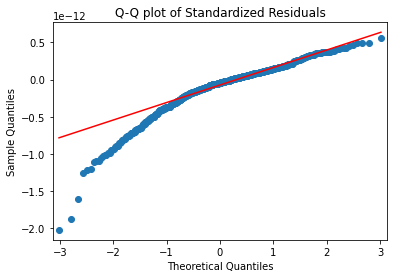

In [459]:
sm.qqplot(lmod.resid,line="q")
plt.title("Q-Q plot of Standardized Residuals")
plt.show()

In [460]:
data_pred = lmod.get_prediction(sm.add_constant(test_x)).summary_frame(alpha=0.1)
data_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
41,-8.425616,7.928415e-14,-8.425616,-8.425616,-8.425616,-8.425616
400,4.806175,1.283181e-13,4.806175,4.806175,4.806175,4.806175
222,3.188290,6.438814e-14,3.188290,3.188290,3.188290,3.188290
696,13.069608,1.481551e-13,13.069608,13.069608,13.069608,13.069608
908,-10.610777,7.580120e-14,-10.610777,-10.610777,-10.610777,-10.610777


In [461]:
lmod.get_prediction().summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
525,9.804388,6.444952e-14,9.804388,9.804388,9.804388,9.804388
739,-9.043357,5.843549e-14,-9.043357,-9.043357,-9.043357,-9.043357
835,-5.346627,6.716123e-14,-5.346627,-5.346627,-5.346627,-5.346627
372,0.688160,8.041102e-14,0.688160,0.688160,0.688160,0.688160
759,-11.437453,6.762851e-14,-11.437453,-11.437453,-11.437453,-11.437453
...,...,...,...,...,...,...
207,6.939549,7.711021e-14,6.939549,6.939549,6.939549,6.939549
54,1.137376,6.089305e-14,1.137376,1.137376,1.137376,1.137376
298,5.445606,9.165888e-14,5.445606,5.445606,5.445606,5.445606
745,-7.916030,7.701422e-14,-7.916030,-7.916030,-7.916030,-7.916030


# Residual Vs Fitted Plot
A "residuals versus fits plot" is the most frequently created plot. The plot is used to detect non-linearity, unequal error variances, and outliers.

- The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.

- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.

- No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers

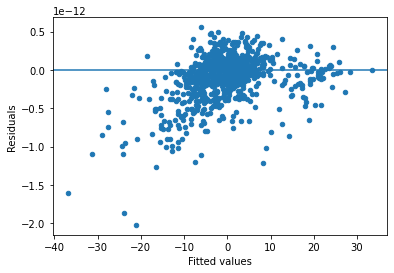

In [462]:
plt.scatter(lmod.fittedvalues,lmod.resid,s=20)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.axhline(0)

# Question - 3(B)

We can select best ALPHA for this set through Lasso Cross Validation method where cv=6 & using iteration = 10000

In [463]:
model  = LassoCV(cv=6, random_state = 0, max_iter = 10000)
model.fit(train_x, train_y)
model.alpha_

44.408347361092076

In [464]:
reg = Lasso(alpha = model.alpha_)
lasso_fit = reg.fit(train_x,train_y)
importance = np.abs(lasso_fit.coef_)
print(importance)

[0.00000000e+00 5.73864828e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.06212345e-03 2.84455028e-04 0.00000000e+00
 9.08919556e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.39839377e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00899771e-03 0.00000000e+00 8.60096398e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.09361917e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [465]:
new_column = np.array(train_x.columns)[importance > 0]
new_column

array(['customer_id', 'total_sum_duration', 'tot_usage_mb',
       'download_usage_mb', 'total_payment_made',
       'current_active_plan_mrp', 'last_cycle_plan_mrp', 'recharge_delay'],
      dtype=object)

In [466]:
linear_reg_data_important = telecom_df[new_column]
linear_reg_data_important

,customer_id,total_sum_duration,tot_usage_mb,download_usage_mb,total_payment_made,current_active_plan_mrp,last_cycle_plan_mrp,recharge_delay
0,10000,279.136731,12118.937797,9784.504851,4224.111165,2999,500,-8.514211
1,10001,23.711969,6890.805638,6836.815073,2664.439350,99,999,2.857576
3,10003,57.626057,28003.926818,22298.432663,1494.685489,2999,99,2.043550
4,10004,128.367375,17087.617807,9869.063341,6433.646235,500,1500,1.002575
5,10005,211.772078,7197.258396,3565.354846,7343.454794,128,2999,-2.561945
...,...,...,...,...,...,...,...,...
994,10994,80.212218,11512.950359,9900.401721,4744.001770,1500,1500,-8.984537
996,10996,530.489358,5480.188595,4091.917488,7473.427445,128,2999,19.206418
997,10997,159.836350,11699.401040,8523.156903,4094.138513,1500,999,1.092822
998,10998,438.060146,26974.717828,21221.721170,3054.357304,1500,99,-6.607807


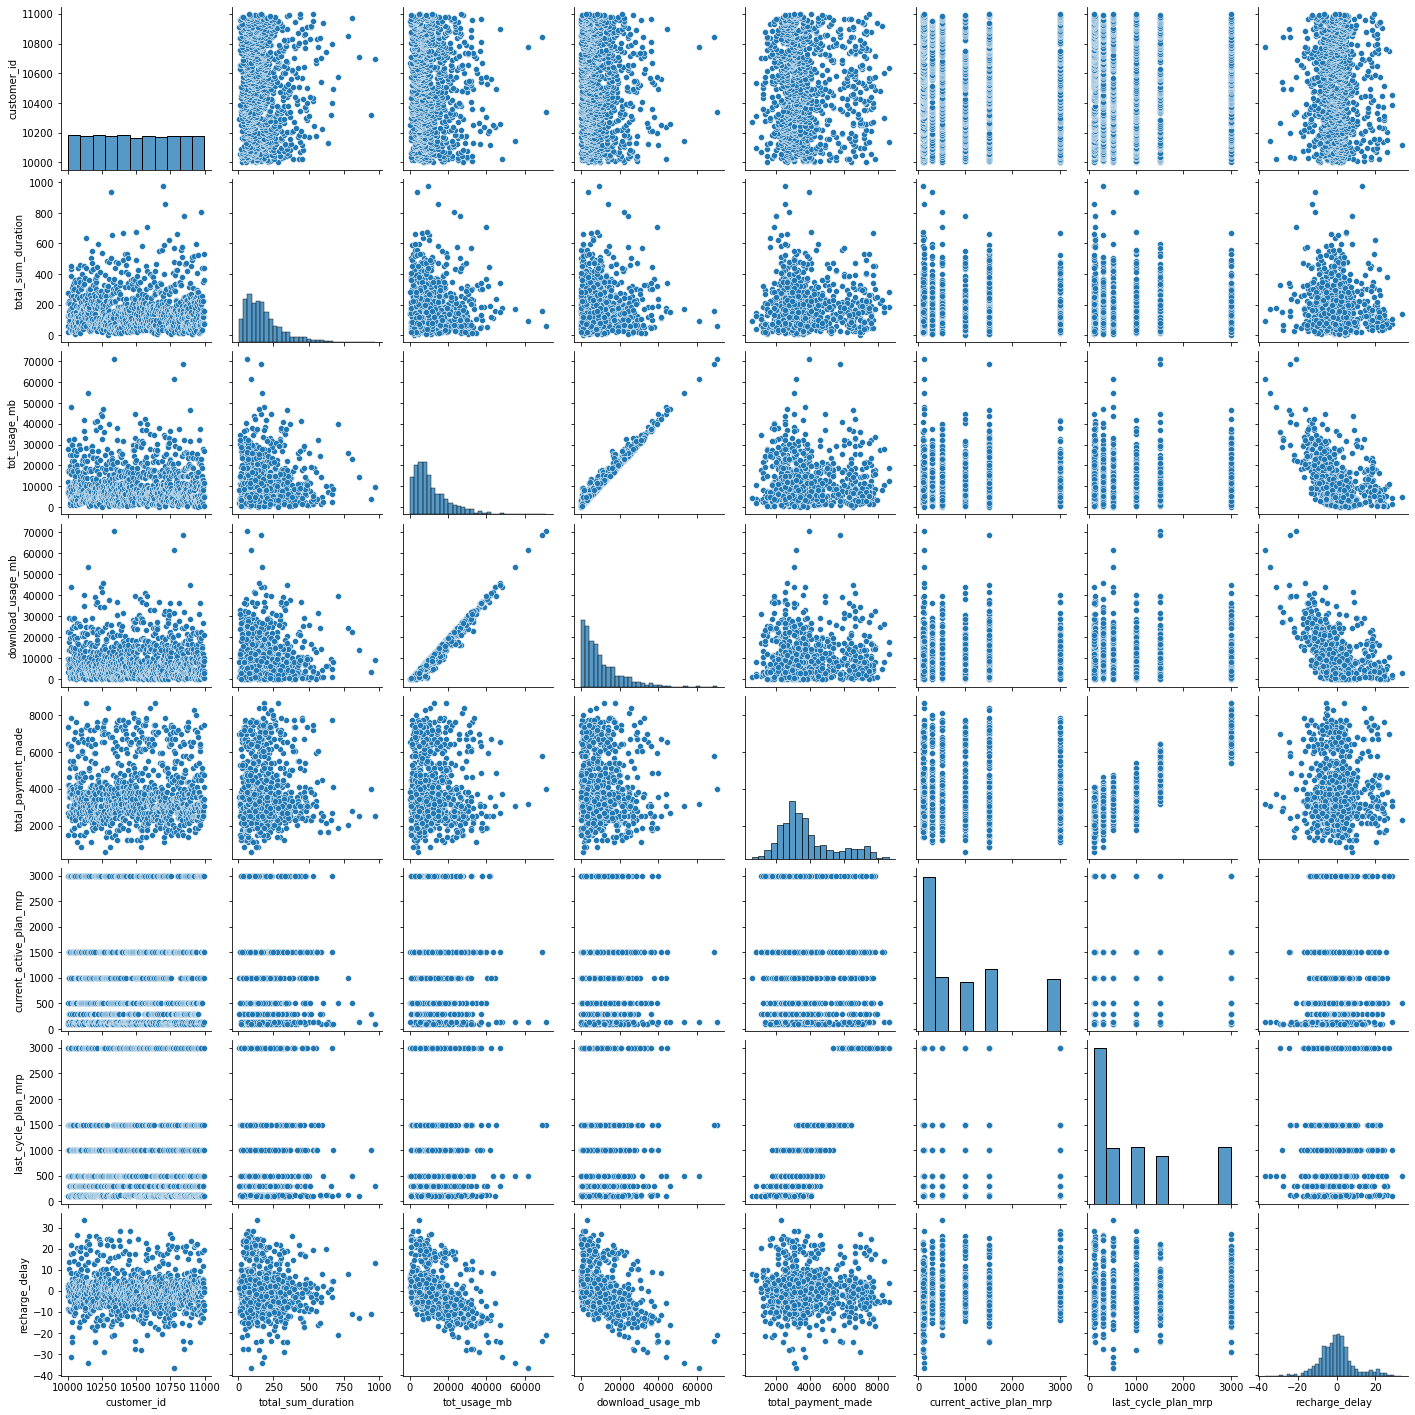

In [467]:
sns.pairplot(linear_reg_data_important)

In [468]:
x = linear_reg_data_important
x = sm.add_constant(x)
y = telecom_df1
train_x_1, test_x_1 , train_y_1, test_y_1 = train_test_split(x ,y ,train_size=0.8,random_state=1234)

lmod_1 = sm.OLS(train_y_1, train_x_1).fit()
lmod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         recharge_delay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.653e+27
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:16:04   Log-Likelihood:                 20345.
No. Observations:                 776   AIC:                        -4.067e+04
Df Residuals:                     767   BIC:                        -4.063e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.842e-14   1.32e-12      0.022      0.983   -2.57e-12    2.62e-12
customer_id              6.484e-17   1.25e-16      0.518      0.604   -1.81e-16     3.1e-16
total_sum_duration       7.156e-17   2.74e-16      0.261      0.794   -4.67e-16     6.1e-16
tot_usage_mb             1.735e-17   2.36e-17      0.736      0.462   -2.89e-17    6.36e-17
download_usage_mb        1.594e-17    2.4e-17      0.665      0.506   -3.11e-17     6.3e-17
total_payment_made      -3.806e-17   5.19e-17     -0.733      0.464    -1.4e-16    6.38e-17
current_active_plan_mrp -2.331e-18    3.9e-17     -0.060      0.952   -7.89e-17    7.43e-17
last_cycle_plan_mrp      6.343e-18   8.69e-17      0.073      0.942   -1.64e-16    1.77e-16
recharge_delay              1.0000   4.82e-15   2.08e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      303.835   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1216.450
Skew:                          -1.825   Prob(JB):                    7.10e-265
Kurtosis:                       7.930   Cond. No.                     8.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [469]:
lmod_1.predict()

array([ 9.80438800e+00, -9.04335683e+00, -5.34662716e+00,  6.88159842e-01,
       -1.14374530e+01, -1.02676794e+00,  9.16095149e+00, -1.45305875e+01,
        1.01907522e+01, -2.28207297e+00,  2.09391491e+01, -4.81306487e+00,
       -9.48186157e-01,  5.29425459e+00, -5.72329543e+00,  9.97014541e-01,
       -1.79930396e+00,  5.73171122e+00, -1.14516086e+01,  8.30268533e+00,
       -5.40208032e+00,  3.88312173e+00,  8.23449051e+00, -1.14333685e+01,
        4.38146250e+00, -3.82733484e+00,  8.93594202e-01,  8.76301873e-01,
       -1.64349233e+01, -8.24421880e+00,  1.07842898e+01, -1.27790802e+01,
       -8.03293836e+00, -3.73475755e+00,  8.27289792e+00, -8.28758610e+00,
        2.80496312e-01, -3.09958582e+00, -7.82575173e-01, -8.49015231e+00,
        3.17557692e+00,  3.50811112e+00, -3.88802926e+00, -1.64589636e+01,
        2.31792555e+00,  1.72715077e+01,  3.49661147e-01,  2.01890743e+01,
       -8.36526585e+00,  9.43501563e-01, -1.54178634e+01,  2.67867875e+00,
       -3.42355322e+00, -

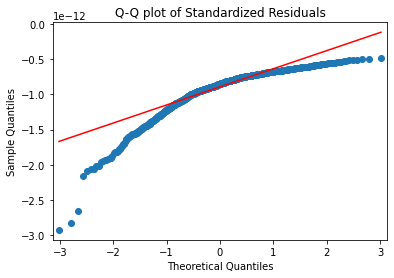

In [470]:
sm.qqplot(lmod_1.resid,line="q")
plt.title("Q-Q plot of Standardized Residuals")
plt.show()

In [471]:
data_pred_1 = lmod_1.get_prediction(sm.add_constant(test_x_1)).summary_frame(alpha=0.1)
data_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
41,-8.425616,7.928415e-14,-8.425616,-8.425616,-8.425616,-8.425616
400,4.806175,1.283181e-13,4.806175,4.806175,4.806175,4.806175
222,3.188290,6.438814e-14,3.188290,3.188290,3.188290,3.188290
696,13.069608,1.481551e-13,13.069608,13.069608,13.069608,13.069608
908,-10.610777,7.580120e-14,-10.610777,-10.610777,-10.610777,-10.610777


# Question-4(A)

In [472]:
telecom_df["churn"] = telecom_df["recharge_delay"].apply(lambda x: 1 if x > 5.017 else 0)
logistic_data = telecom_df
X = telecom_df
y = telecom_df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
#accuracy score
print(model.score(X_test, y_test))
print(metrics.accuracy_score(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

0.8092783505154639
0.8092783505154639
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       151
           1       0.67      0.28      0.39        43

    accuracy                           0.81       194
   macro avg       0.75      0.62      0.64       194
weighted avg       0.79      0.81      0.78       194



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Question-4(B)

In [473]:
model  = LassoCV(cv=6, random_state = 0, max_iter = 10000)
model.fit(X_train, y_train)
alp = model.alpha_
alp

0.6680163990845713

In [474]:
regular = Lasso(alpha = alp)
lasso_fit = regular.fit(X_train,y_train)
importance_1 = np.abs(lasso_fit.coef_)
print(importance_1)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.51284454e-06 4.28162017e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.50508705e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.21911068e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.99472819e-06
 0.00000000e+00 0.00000000e+00 6.16253415e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.56060225e-04
 2.61245524e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [475]:
updated_column = np.array(train_x.columns)[importance > 0]
updated_column

array(['customer_id', 'total_sum_duration', 'tot_usage_mb',
       'download_usage_mb', 'total_payment_made',
       'current_active_plan_mrp', 'last_cycle_plan_mrp', 'recharge_delay'],
      dtype=object)

In [476]:
logistic_data_important = logistic_data[updated_column]
logistic_data_important

,customer_id,total_sum_duration,tot_usage_mb,download_usage_mb,total_payment_made,current_active_plan_mrp,last_cycle_plan_mrp,recharge_delay
0,10000,279.136731,12118.937797,9784.504851,4224.111165,2999,500,-8.514211
1,10001,23.711969,6890.805638,6836.815073,2664.439350,99,999,2.857576
3,10003,57.626057,28003.926818,22298.432663,1494.685489,2999,99,2.043550
4,10004,128.367375,17087.617807,9869.063341,6433.646235,500,1500,1.002575
5,10005,211.772078,7197.258396,3565.354846,7343.454794,128,2999,-2.561945
...,...,...,...,...,...,...,...,...
994,10994,80.212218,11512.950359,9900.401721,4744.001770,1500,1500,-8.984537
996,10996,530.489358,5480.188595,4091.917488,7473.427445,128,2999,19.206418
997,10997,159.836350,11699.401040,8523.156903,4094.138513,1500,999,1.092822
998,10998,438.060146,26974.717828,21221.721170,3054.357304,1500,99,-6.607807


In [477]:
X = logistic_data_important
y = telecom_df.churn

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=12)

model = LogisticRegression()
model.fit(X_train_1, y_train_1)

predictions = model.predict(X_test_1)

cm_1 = metrics.confusion_matrix(y_test_1, predictions)
#accuracy score
print(model.score(X_test_1, y_test_1))
print(metrics.accuracy_score(y_test_1, predictions))

print(metrics.classification_report(y_test_1, predictions))

0.9896907216494846
0.9896907216494846
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.97      0.97      0.97        34

    accuracy                           0.99       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.99      0.99      0.99       194



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
